In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.decomposition import PC
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('df.csv')

df.head()

,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness,kmeans
0,(Nice Dream),The Bends,Radiohead,4QbQ55kHcRNho6XLaPctT1,1995-03-28,55,0.262,0.567,0.377,-11.075,1
1,15 Step,In Rainbows,Radiohead,6dsq7Nt5mIFzvm5kIYNORy,2007-12-28,61,0.600,0.853,0.847,-7.584,1
2,2 + 2 = 5,Hail To the Thief,Radiohead,37kUGdEJJ7NaMl5LFW4EA4,2003,57,0.443,0.717,0.386,-5.498,1
3,A Brain in a Bottle,Tomorrow's Modern Boxes,Thom Yorke,0ztEZNjeZQ45nMcsqYxxyc,2014,43,0.787,0.558,0.431,-12.365,1
4,A Punch Up At a Wedding,Hail To the Thief,Radiohead,2LfUYXF8jfrHCfwYyf2pRj,2003,50,0.603,0.507,0.568,-9.965,1


In [ ]:
label_encoder = LabelEncoder()
df['artNum'] = label_encoder.fit_transform(df['artist'])
df['albNum'] = label_encoder.fit_transform(df['album'])

df.head()

,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness,kmeans,artNum,albNum
0,(Nice Dream),The Bends,Radiohead,4QbQ55kHcRNho6XLaPctT1,1995-03-28,55,0.262,0.567,0.377,-11.075,1,4,43
1,15 Step,In Rainbows,Radiohead,6dsq7Nt5mIFzvm5kIYNORy,2007-12-28,61,0.600,0.853,0.847,-7.584,1,4,20
2,2 + 2 = 5,Hail To the Thief,Radiohead,37kUGdEJJ7NaMl5LFW4EA4,2003,57,0.443,0.717,0.386,-5.498,1,4,15
3,A Brain in a Bottle,Tomorrow's Modern Boxes,Thom Yorke,0ztEZNjeZQ45nMcsqYxxyc,2014,43,0.787,0.558,0.431,-12.365,1,5,52
4,A Punch Up At a Wedding,Hail To the Thief,Radiohead,2LfUYXF8jfrHCfwYyf2pRj,2003,50,0.603,0.507,0.568,-9.965,1,4,15


In [ ]:
X = df[['albNum', 'artNum', 'loudness', 'valence', 'energy', 'danceability']].values
y_deci = df['popularity'].values / 10
y = np.floor(y_deci)
print(y)

[5. 6. 5. 4. 5. 5. 5. 4. 3. 2. 4. 1. 3. 2. 5. 3. 5. 4. 2. 5. 5. 2. 1. 5.
 2. 3. 3. 2. 4. 5. 5. 5. 5. 4. 3. 8. 2. 2. 4. 3. 4. 3. 5. 4. 6. 5. 7. 3.
 4. 3. 5. 2. 3. 5. 3. 4. 1. 2. 5. 7. 6. 4. 4. 5. 3. 5. 5. 5. 3. 1. 3. 6.
 3. 6. 7. 4. 5. 5. 6. 4. 4. 4. 3. 2. 5. 3. 3. 5. 4. 4. 2. 5. 4. 3. 4. 3.
 3. 5. 4. 7. 4. 3. 4. 1. 1. 2. 2. 5. 4. 6. 5. 4. 5. 4. 4. 4. 6. 3. 4. 3.
 2. 4. 4. 4. 3. 4. 2. 4. 4. 6. 3. 5. 4. 5. 3. 2. 3. 5. 4. 4. 2. 0. 4. 5.
 3. 5. 4. 2. 3. 5. 4. 5. 3. 4. 4. 2. 2. 5. 5. 1. 1. 2. 0. 0. 0. 0. 0. 3.
 2. 0. 3. 0. 0. 2. 1. 3. 0. 2. 2. 1. 1. 0. 3. 1. 2. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 3. 0. 1. 1. 1. 3. 1. 2. 3. 2. 0. 2. 0. 3. 2. 3.
 2. 1. 1. 0. 0. 1. 0. 0. 0. 0. 4. 2. 1. 3. 2. 4. 2. 3. 6. 4. 3. 3. 5. 5.
 3. 5. 4. 5. 4. 5. 5. 6. 3. 5. 5. 4. 4. 5. 4. 4. 4. 4. 4. 6. 4. 4. 4. 4.
 5. 4. 3. 0. 3. 5. 4. 4. 4. 4. 4. 4. 3. 4. 5. 4. 5. 6. 3. 3. 4. 3. 5. 6.
 3. 5. 3. 5. 6. 3. 3. 2. 2. 3. 5. 2. 4. 3. 3. 3. 4. 5. 2. 3. 1. 4. 4. 5.
 5. 3. 4. 5. 1. 4. 1. 5. 3. 1. 1. 1. 4. 6. 5. 3. 2.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# Create MLP model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(128, 100),
            nn.LeakyReLU(0.2),
            nn.Linear(100, 64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(64,30),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(30, 10),
        )

    def forward(self, x):
        return self.layers(x)


model = MLP()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
loss_history = []
accuracy_history = []

In [ ]:
epochs = 500

for epoch in range(epochs): # Run this for however many epochs you defined
    model.train() # Switch the model into training mode. Everything from here just runs the forward and backward pass
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item()) # Keep track of the loss in the list defined above

    with torch.no_grad():
        preds = torch.argmax(model(X_train_tensor), dim=1)
        acc = accuracy_score(y_train_tensor, preds)
        accuracy_history.append(acc) # Keep track of the accuracy in the list defined above

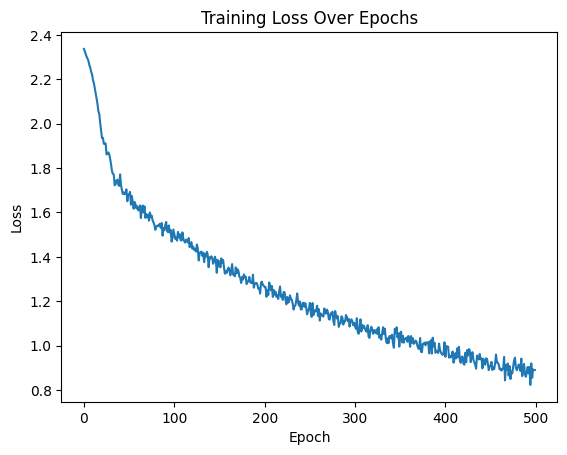

In [ ]:
# Plot loss
plt.figure()
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

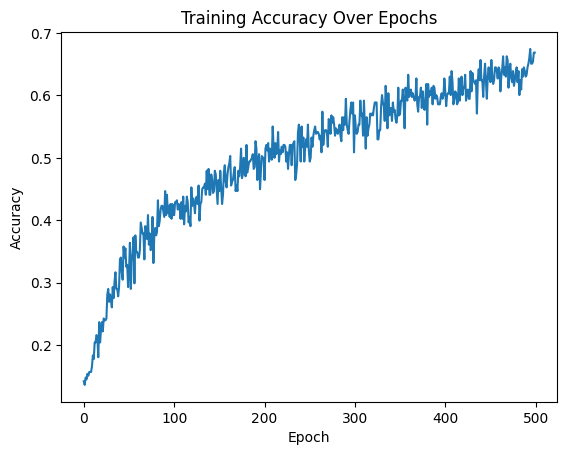

In [ ]:
# Plot accuracy

plt.figure()
plt.plot(accuracy_history)
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
model.eval() # This switches the model from training mode into evaluation mode
with torch.no_grad():
    test_preds = torch.argmax(model(X_test_tensor), dim=1)
    acc = accuracy_score(y_test_tensor, test_preds)
    cm = confusion_matrix(y_test_tensor, test_preds)

print("Test Accuracy:", acc)
print("Confusion Matrix:", cm)

Test Accuracy: 0.43529411764705883
Confusion Matrix: [[ 6  1  0  0  0  0  0]
 [ 2  9  2  3  0  2  0]
 [ 1  4  2  4  0  1  0]
 [ 0  2  0  7  2  1  0]
 [ 0  0  1  1  6 11  1]
 [ 0  0  0  2  6  7  0]
 [ 0  0  0  0  1  0  0]]


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

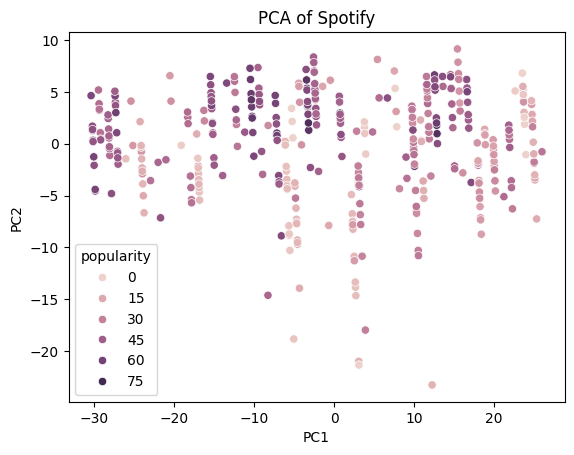

In [ ]:
# Plot the results
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue = df['popularity'])
# [:,0] gets first component for all samples, while [:,1] gets second component for all samples
plt.title("PCA of Spotify")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
# Get the loadings
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to get features as rows
    columns=["PC1", "PC2"],
    index=['albNum', 'artNum', 'loudness', 'valence', 'energy', 'danceability'] # Use the original column names from df
)

print("\nPCA Loadings (Feature Contributions):")
print(loadings)


PCA Loadings (Feature Contributions):
                   PC1       PC2
albNum        0.998367  0.055936
artNum        0.007532  0.072549
loudness     -0.056580  0.994726
valence      -0.000896  0.017999
energy       -0.002032  0.039356
danceability -0.000873  0.015946


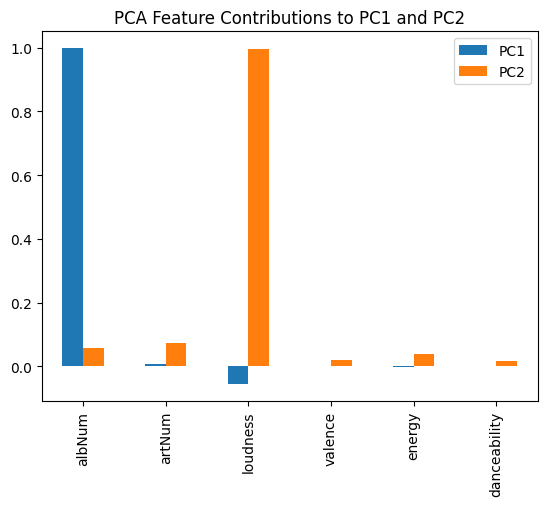

In [ ]:
# Plot the loadings
loadings.plot(kind='bar')
plt.title("PCA Feature Contributions to PC1 and PC2")
plt.show()

In [ ]:
X2 = df[['albNum', 'artNum', 'loudness']]
y2_deci = df['popularity'].values / 10
y2 = np.floor(y)
print(y2)

[5. 6. 5. 4. 5. 5. 5. 4. 3. 2. 4. 1. 3. 2. 5. 3. 5. 4. 2. 5. 5. 2. 1. 5.
 2. 3. 3. 2. 4. 5. 5. 5. 5. 4. 3. 8. 2. 2. 4. 3. 4. 3. 5. 4. 6. 5. 7. 3.
 4. 3. 5. 2. 3. 5. 3. 4. 1. 2. 5. 7. 6. 4. 4. 5. 3. 5. 5. 5. 3. 1. 3. 6.
 3. 6. 7. 4. 5. 5. 6. 4. 4. 4. 3. 2. 5. 3. 3. 5. 4. 4. 2. 5. 4. 3. 4. 3.
 3. 5. 4. 7. 4. 3. 4. 1. 1. 2. 2. 5. 4. 6. 5. 4. 5. 4. 4. 4. 6. 3. 4. 3.
 2. 4. 4. 4. 3. 4. 2. 4. 4. 6. 3. 5. 4. 5. 3. 2. 3. 5. 4. 4. 2. 0. 4. 5.
 3. 5. 4. 2. 3. 5. 4. 5. 3. 4. 4. 2. 2. 5. 5. 1. 1. 2. 0. 0. 0. 0. 0. 3.
 2. 0. 3. 0. 0. 2. 1. 3. 0. 2. 2. 1. 1. 0. 3. 1. 2. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 3. 0. 1. 1. 1. 3. 1. 2. 3. 2. 0. 2. 0. 3. 2. 3.
 2. 1. 1. 0. 0. 1. 0. 0. 0. 0. 4. 2. 1. 3. 2. 4. 2. 3. 6. 4. 3. 3. 5. 5.
 3. 5. 4. 5. 4. 5. 5. 6. 3. 5. 5. 4. 4. 5. 4. 4. 4. 4. 4. 6. 4. 4. 4. 4.
 5. 4. 3. 0. 3. 5. 4. 4. 4. 4. 4. 4. 3. 4. 5. 4. 5. 6. 3. 3. 4. 3. 5. 6.
 3. 5. 3. 5. 6. 3. 3. 2. 2. 3. 5. 2. 4. 3. 3. 3. 4. 5. 2. 3. 1. 4. 4. 5.
 5. 3. 4. 5. 1. 4. 1. 5. 3. 1. 1. 1. 4. 6. 5. 3. 2.

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42069)

In [ ]:
scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

In [ ]:
X2_train_tensor = torch.tensor(X2_train, dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train, dtype=torch.long)
X2_test_tensor = torch.tensor(X2_test, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test, dtype=torch.long)

In [ ]:
# Create MLP model
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(X2_train.shape[1], 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(128, 100),
            nn.LeakyReLU(0.2),
            nn.Linear(100, 64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(64,30),
            nn.LeakyReLU(0.2),
            #nn.Dropout(0.2),
            nn.Linear(30, 10),
        )

    def forward(self, x):
        return self.layers(x)


model2 = MLP2()

In [ ]:
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)
loss_fn2 = nn.CrossEntropyLoss()

In [ ]:
loss_history2 = []
accuracy_history2 = []

In [ ]:
epochs2 = 500

for epoch2 in range(epochs2):
  model2.train()
  optimizer2.zero_grad()
  outputs2 = model2(X2_train_tensor)
  loss2 = loss_fn2(outputs2, y2_train_tensor)
  loss2.backward()
  optimizer2.step()
  loss_history2.append(loss2.item())

  with torch.no_grad():
    preds2 = torch.argmax(model2(X2_train_tensor), dim=1)
    acc2 = accuracy_score(y2_train_tensor, preds2)
    accuracy_history2.append(acc2)

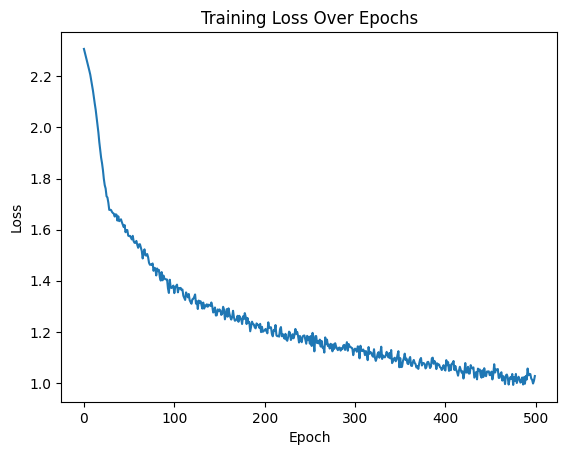

In [ ]:
plt.figure()
plt.plot(loss_history2)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

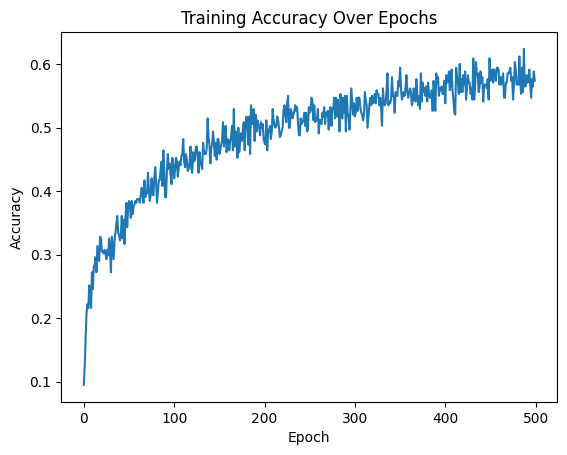

In [ ]:
plt.figure()
plt.plot(accuracy_history2)
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
model.eval() # This switches the model from training mode into evaluation mode
with torch.no_grad():
    test_preds2 = torch.argmax(model2(X2_test_tensor), dim=1)
    acc2 = accuracy_score(y2_test_tensor, test_preds2)
    cm2 = confusion_matrix(y2_test_tensor, test_preds2)

print("Test Accuracy:", acc2)
print("Confusion Matrix:", cm2)

Test Accuracy: 0.4823529411764706
Confusion Matrix: [[ 6  1  0  0  0  0  0]
 [ 2  9  4  3  0  0  0]
 [ 1  2  4  5  0  0  0]
 [ 2  0  1  6  1  1  1]
 [ 0  0  1  1 10  6  2]
 [ 0  0  0  3  6  6  0]
 [ 0  0  0  0  0  1  0]]
